In [1]:
#importing packages

# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.stats import norm 



import warnings
warnings.filterwarnings("ignore")

In [2]:
#Question 1

#Preprocessing the data


In [3]:
#part a

cc = pd.read_csv("data_credit_card.csv")

#Checking a few observations to get familiar with the data
cc.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
#part b
#Checking the size of the data set

cc.shape

#There are 18 columns and 8950 rows in the dataset

(8950, 18)

In [5]:
#Checking the info of the data set

cc.info()

# There are 14 columns of float datatype, 3 columns of integer datatype and 1 of object datatype
#we can drop Cust_ID later on because it does not serve any useful purpose and is of object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
cc.describe().T

# A lot of columns like Balance, Purchases,Installments purchases can be seen to have outliers

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [7]:
#part c

# The total number of missing values in the dataframe
print (  "\nMissing values :  ", cc.isnull().sum().values.sum()  )

# printing total numbers of Unique value in the dataframe. 
print (  "\nUnique values :  \n", cc.nunique()  )



Missing values :   314

Unique values :  
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [8]:

cc.isnull().any()

#Here we can see that CREDIT_LIMIT and MINIMUM_PAYMENTS have null or missing values

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [9]:
#fixing missing values in each column

#CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we are replacing them with the mean.

cc['CREDIT_LIMIT'].fillna(cc['CREDIT_LIMIT'].mean(),inplace=True)

cc['CREDIT_LIMIT'].count()


cc['MINIMUM_PAYMENTS'].mean()
cc['MINIMUM_PAYMENTS'].fillna(cc['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [10]:
cc.isnull().any()


CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

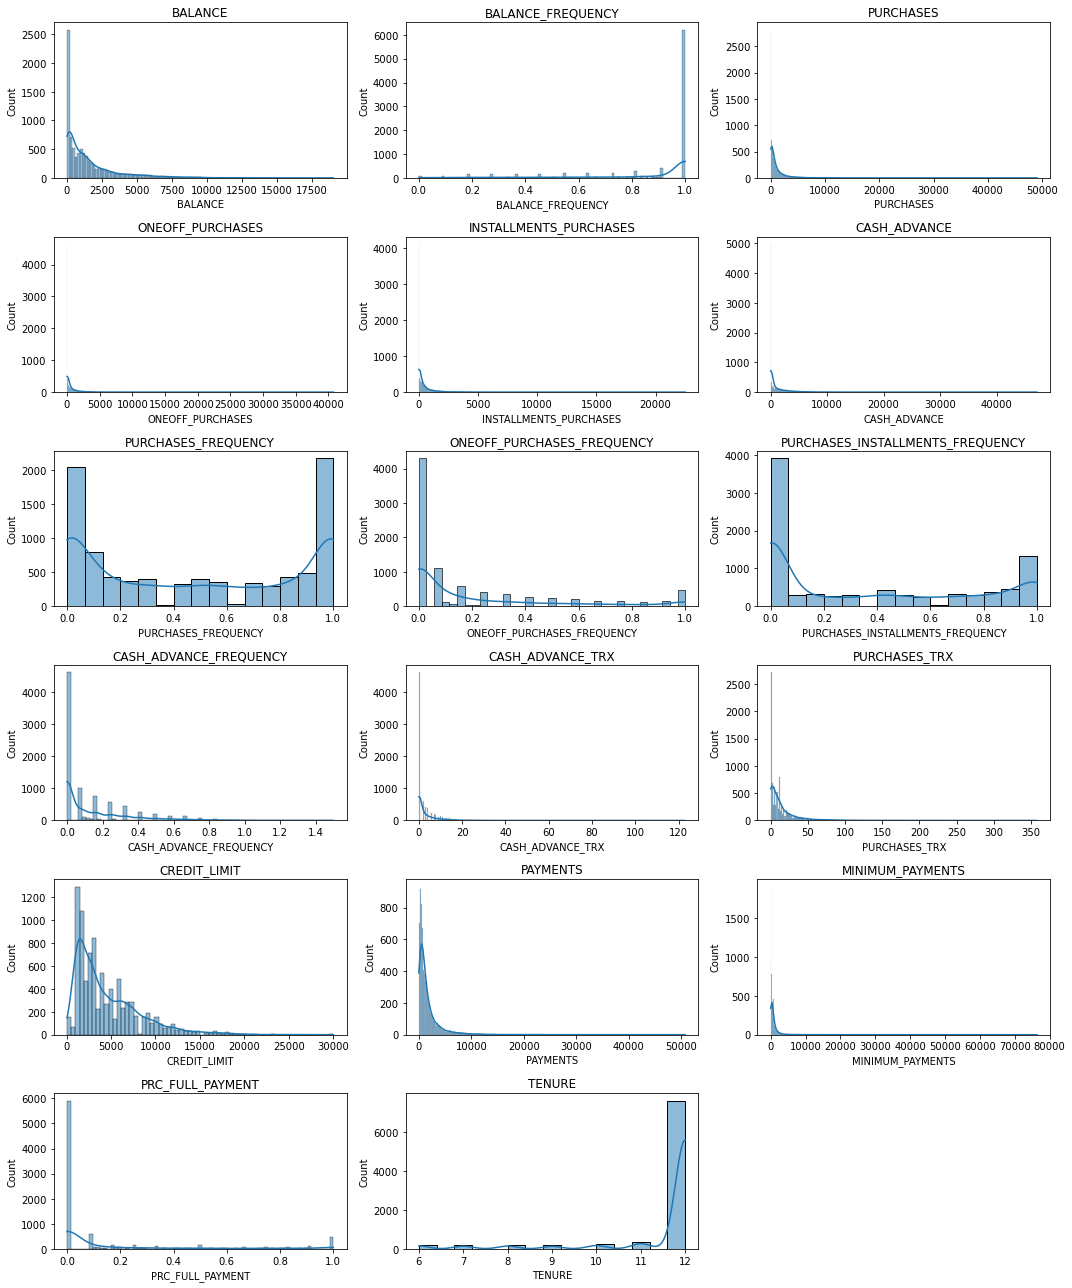

In [11]:
#Checking the variables
variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.histplot(cc[variables[i]].dropna(),kde=True)
    plt.title(variables[i])

plt.tight_layout()
    

In [12]:
#part d
#Dropping unnecessary columns
cc.drop("CUST_ID", axis=1, inplace=True)

<AxesSubplot:>

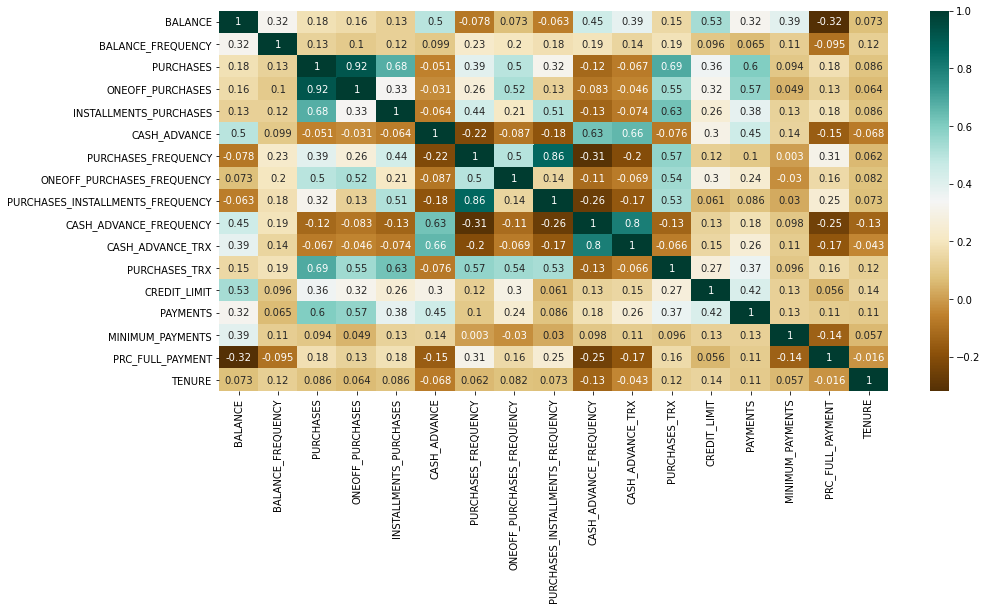

In [13]:
#part e
#Checking correlation among features

plt.figure(figsize = (15,7))
sns.heatmap(cc.corr(), cmap='BrBG',annot=True)

In [14]:
#CASH_ADVANCE and CREDIT_LIMIT have a correlation with BALANCE  which is above 0.5
#ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES  have a very high correlation with PURCHASES of 0.92 and 0.68
#PURCHASES_TRX and PAYMENTS have a correlation with PURCHASES of 0.69 and 0.6
#CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX have high correlation with CASH_ADVANCE which is above 0.6
#CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX have a high corr. of 0.8
#PURCHASEs_FREQ AND PURCHASE_INSTALLMENTS_FREQ have a high correlaton of 0.86

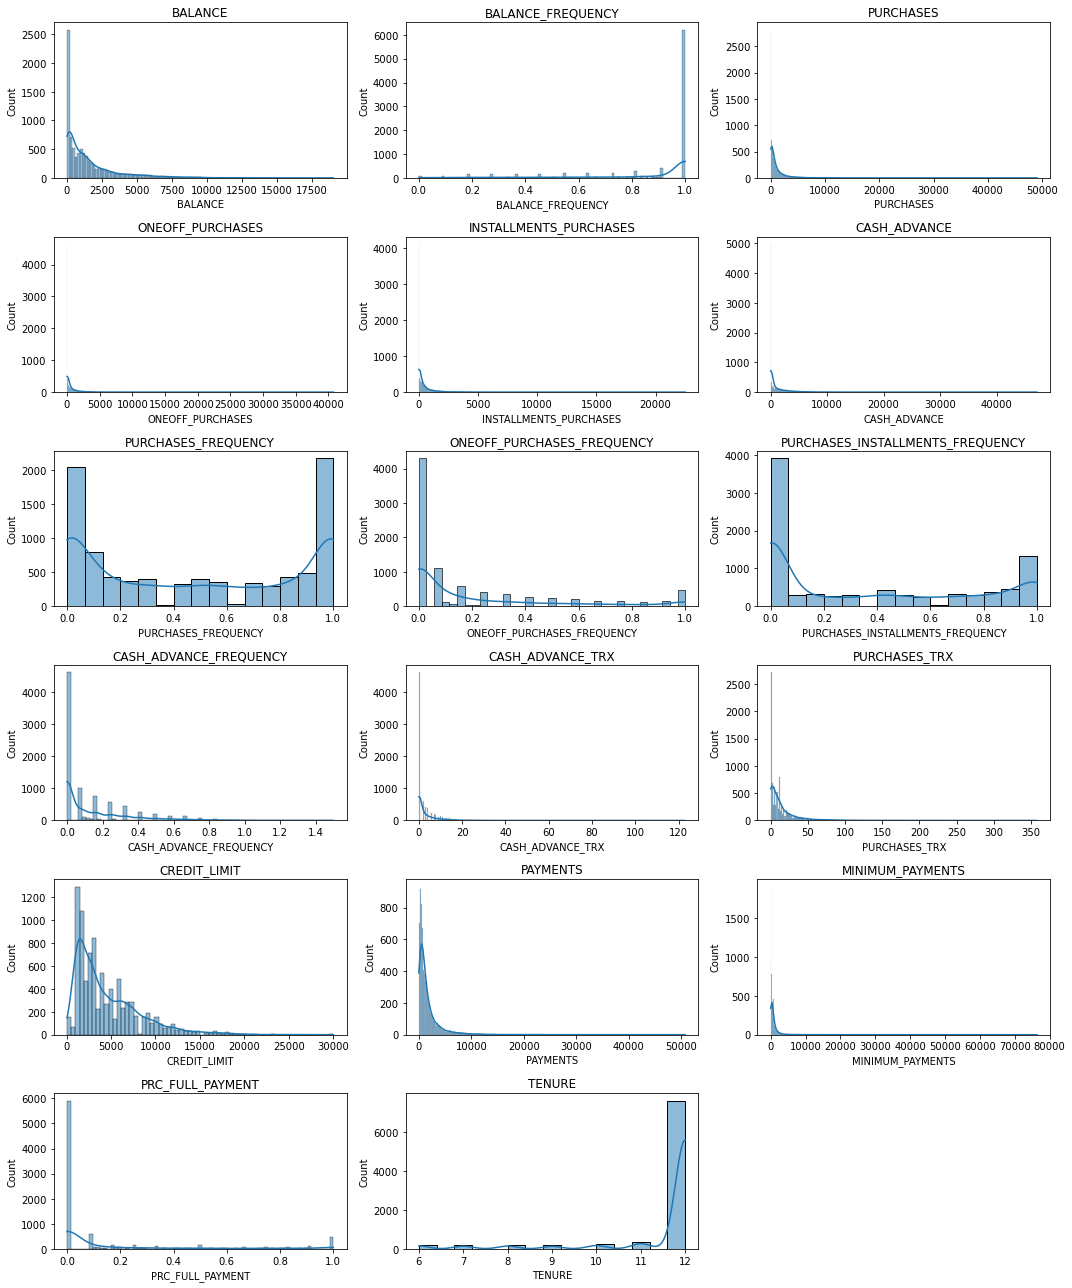

In [15]:
#part f
#Checking  distribution of features

#Checking the variables
variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.histplot(cc[variables[i]].dropna(),kde=True)
    plt.title(variables[i])

plt.tight_layout()

#all the attributes have outliers

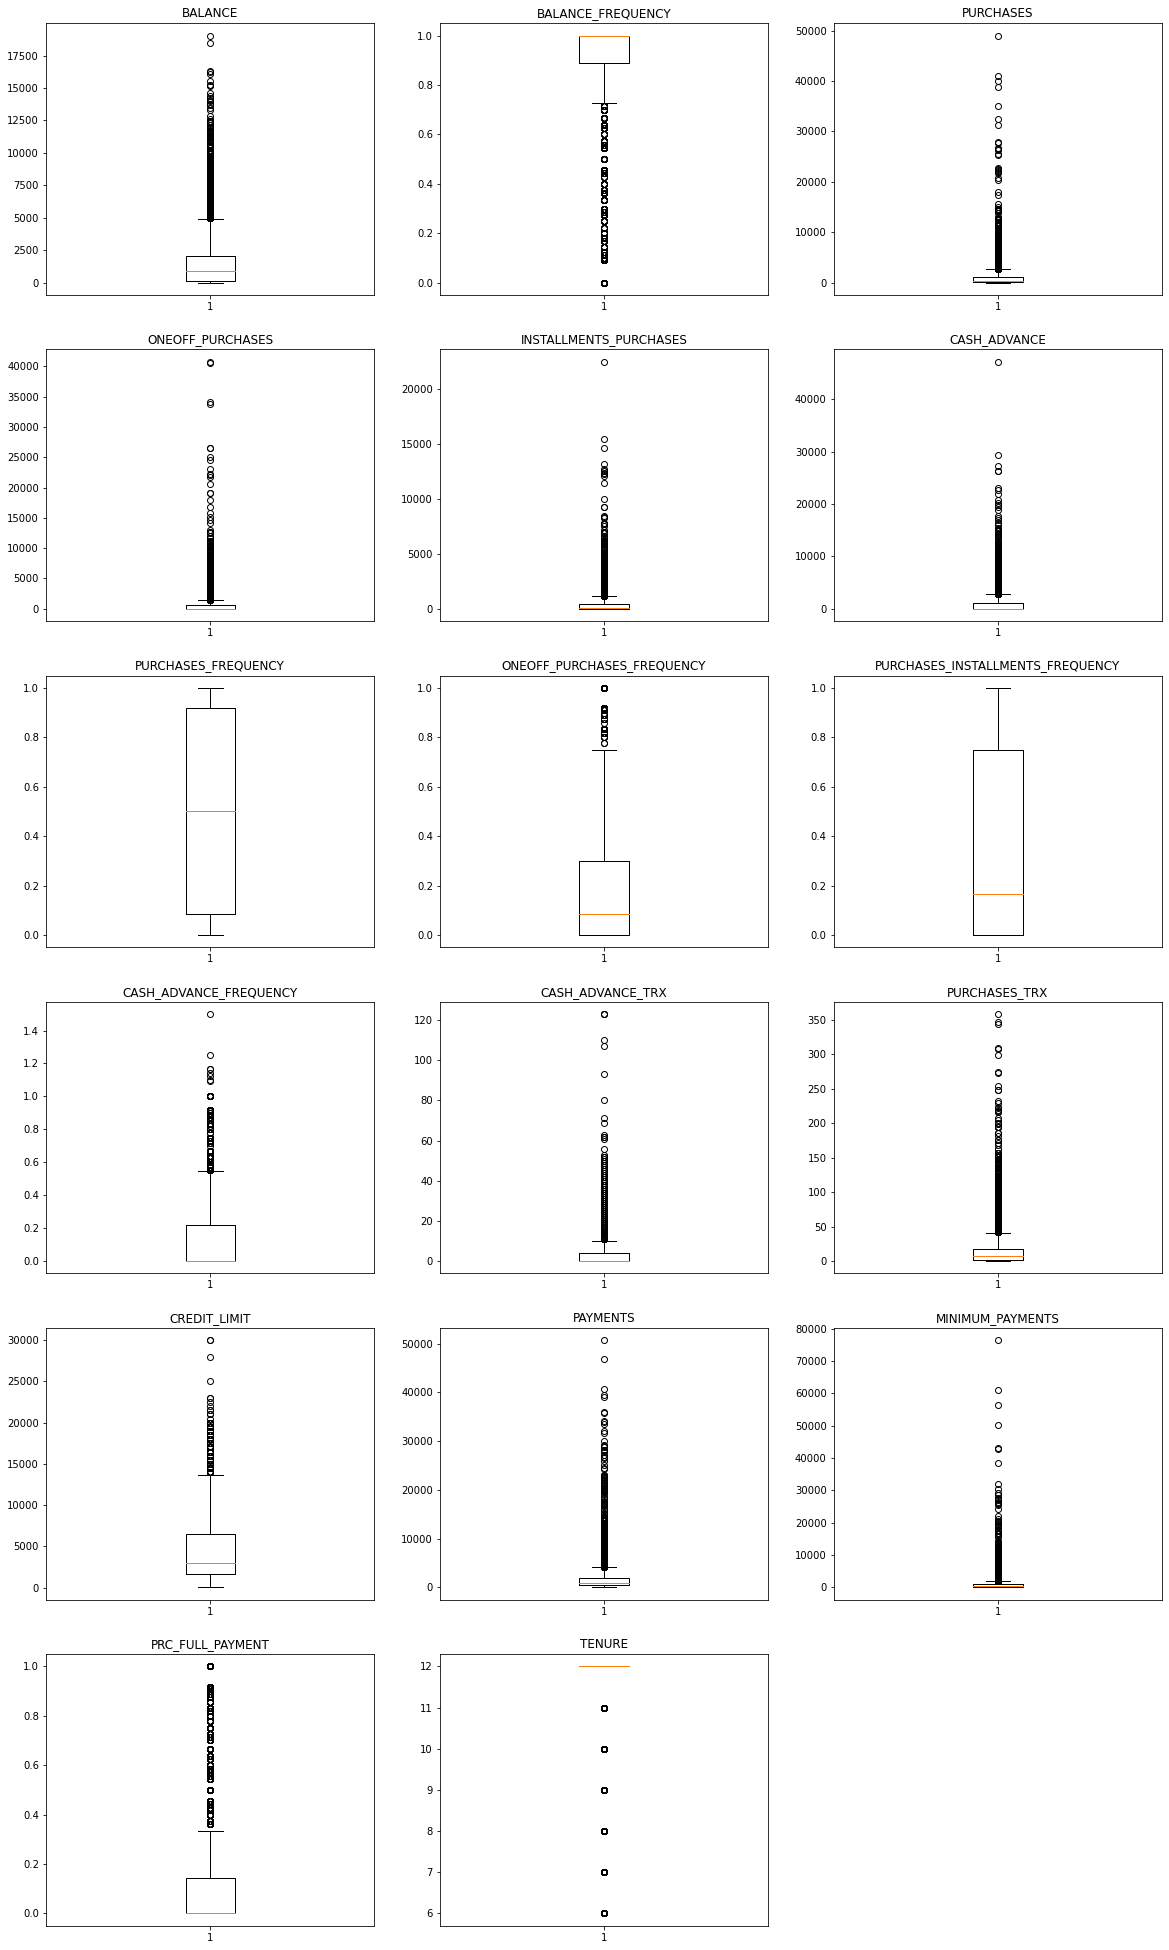

In [16]:
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(cc[variables[i]].dropna())
    plt.title(variables[i])
    
    #it can be seen that almost all the columns have outliers amoung them so we"ll try to log transform the data before standardizing it

In [17]:
#part g
#Standardize the data

#Since there are variables having extreme values 
#So I am doing log-transformation on the dataset to remove outlier effect
cc_log=cc.drop([ 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY' , 'ONEOFF_PURCHASES_FREQUENCY' ,
                    'PURCHASES_INSTALLMENTS_FREQUENCY' , 'CASH_ADVANCE_FREQUENCY' ,
                    'PRC_FULL_PAYMENT' , 'TENURE' ],axis=1).applymap(lambda x: np.log(x+1))

In [18]:
cc_log.describe()

#We were able to handle the outliers using the log function

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  8950.000000  8950.000000       8950.000000             8950.000000   
mean      6.161637     4.899647          3.204274                3.352403   
std       2.013303     2.916872          3.246365                3.082973   
min       0.000000     0.000000          0.000000                0.000000   
25%       4.861995     3.704627          0.000000                0.000000   
50%       6.773521     5.892417          3.663562                4.499810   
75%       7.628099     7.013133          6.360274                6.151961   
max       9.854515    10.800403         10.615512               10.021315   

       CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count   8950.000000       8950.000000    8950.000000   8950.000000   
mean       3.319086          0.817570       1.894731      8.094870   
std        3.566298          1.009316       1.373856      0.819635   
min        0.000000          0.000000       0.000000      3.931826   
25%        0.000000          0.000000       0.693147      7.378384   
50%        0.000000          0.000000       2.079442      8.006701   
75%        7.016449          1.609438       2.890372      8.779711   
max       10.760839          4.820282       5.883322     10.308986   

          PAYMENTS  MINIMUM_PAYMENTS  
count  8950.000000       8950.000000  
mean      6.624540          5.951599  
std       1.591763          1.179645  
min       0.000000          0.018982  
25%       5.951361          5.146667  
50%       6.754489          5.818979  
75%       7.550732          6.762968  
max      10.834125         11.243832

In [19]:
cc.drop([ 'BALANCE', 'PURCHASES','PURCHASES_TRX' , 'ONEOFF_PURCHASES' ,
                    'INSTALLMENTS_PURCHASES' , 'CASH_ADVANCE' ,
                    'CASH_ADVANCE_TRX' , 'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS' ],axis=1,inplace=True)

In [20]:
cc= pd.concat([cc_log,cc], axis = 1)


In [21]:
cc.describe()

#There are no more outliers in the data

BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  8950.000000  8950.000000       8950.000000             8950.000000   
mean      6.161637     4.899647          3.204274                3.352403   
std       2.013303     2.916872          3.246365                3.082973   
min       0.000000     0.000000          0.000000                0.000000   
25%       4.861995     3.704627          0.000000                0.000000   
50%       6.773521     5.892417          3.663562                4.499810   
75%       7.628099     7.013133          6.360274                6.151961   
max       9.854515    10.800403         10.615512               10.021315   

       CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count   8950.000000       8950.000000    8950.000000   8950.000000   
mean       3.319086          0.817570       1.894731      8.094870   
std        3.566298          1.009316       1.373856      0.819635   
min        0.000000          0.000000       0.000000      3.931826   
25%        0.000000          0.000000       0.693147      7.378384   
50%        0.000000          0.000000       2.079442      8.006701   
75%        7.016449          1.609438       2.890372      8.779711   
max       10.760839          4.820282       5.883322     10.308986   

          PAYMENTS  MINIMUM_PAYMENTS  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
count  8950.000000       8950.000000        8950.000000          8950.000000   
mean      6.624540          5.951599           0.877271             0.490351   
std       1.591763          1.179645           0.236904             0.401371   
min       0.000000          0.018982           0.000000             0.000000   
25%       5.951361          5.146667           0.888889             0.083333   
50%       6.754489          5.818979           1.000000             0.500000   
75%       7.550732          6.762968           1.000000             0.916667   
max      10.834125         11.243832           1.000000             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT       TENURE  
count             8950.000000       8950.000000  8950.000000  
mean                 0.135144          0.153715    11.517318  
std                  0.200121          0.292499     1.338331  
min                  0.000000          0.000000     6.000000  
25%                  0.000000          0.000000    12.000000  
50%                  0.000000          0.000000    12.000000  
75%                  0.222222          0.142857    12.000000  
max                  1.500000          1.000000    12.000000

In [22]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#cc_std= scaler.fit_transform(cc)
#This is optional because were going to compute the zScores too

In [23]:
#Question 2
#Building a k-means algorithm for clustering credit card data

from scipy.stats import zscore
ccAttr=cc.iloc[:,1:]
ccScaled=ccAttr.apply(zscore)

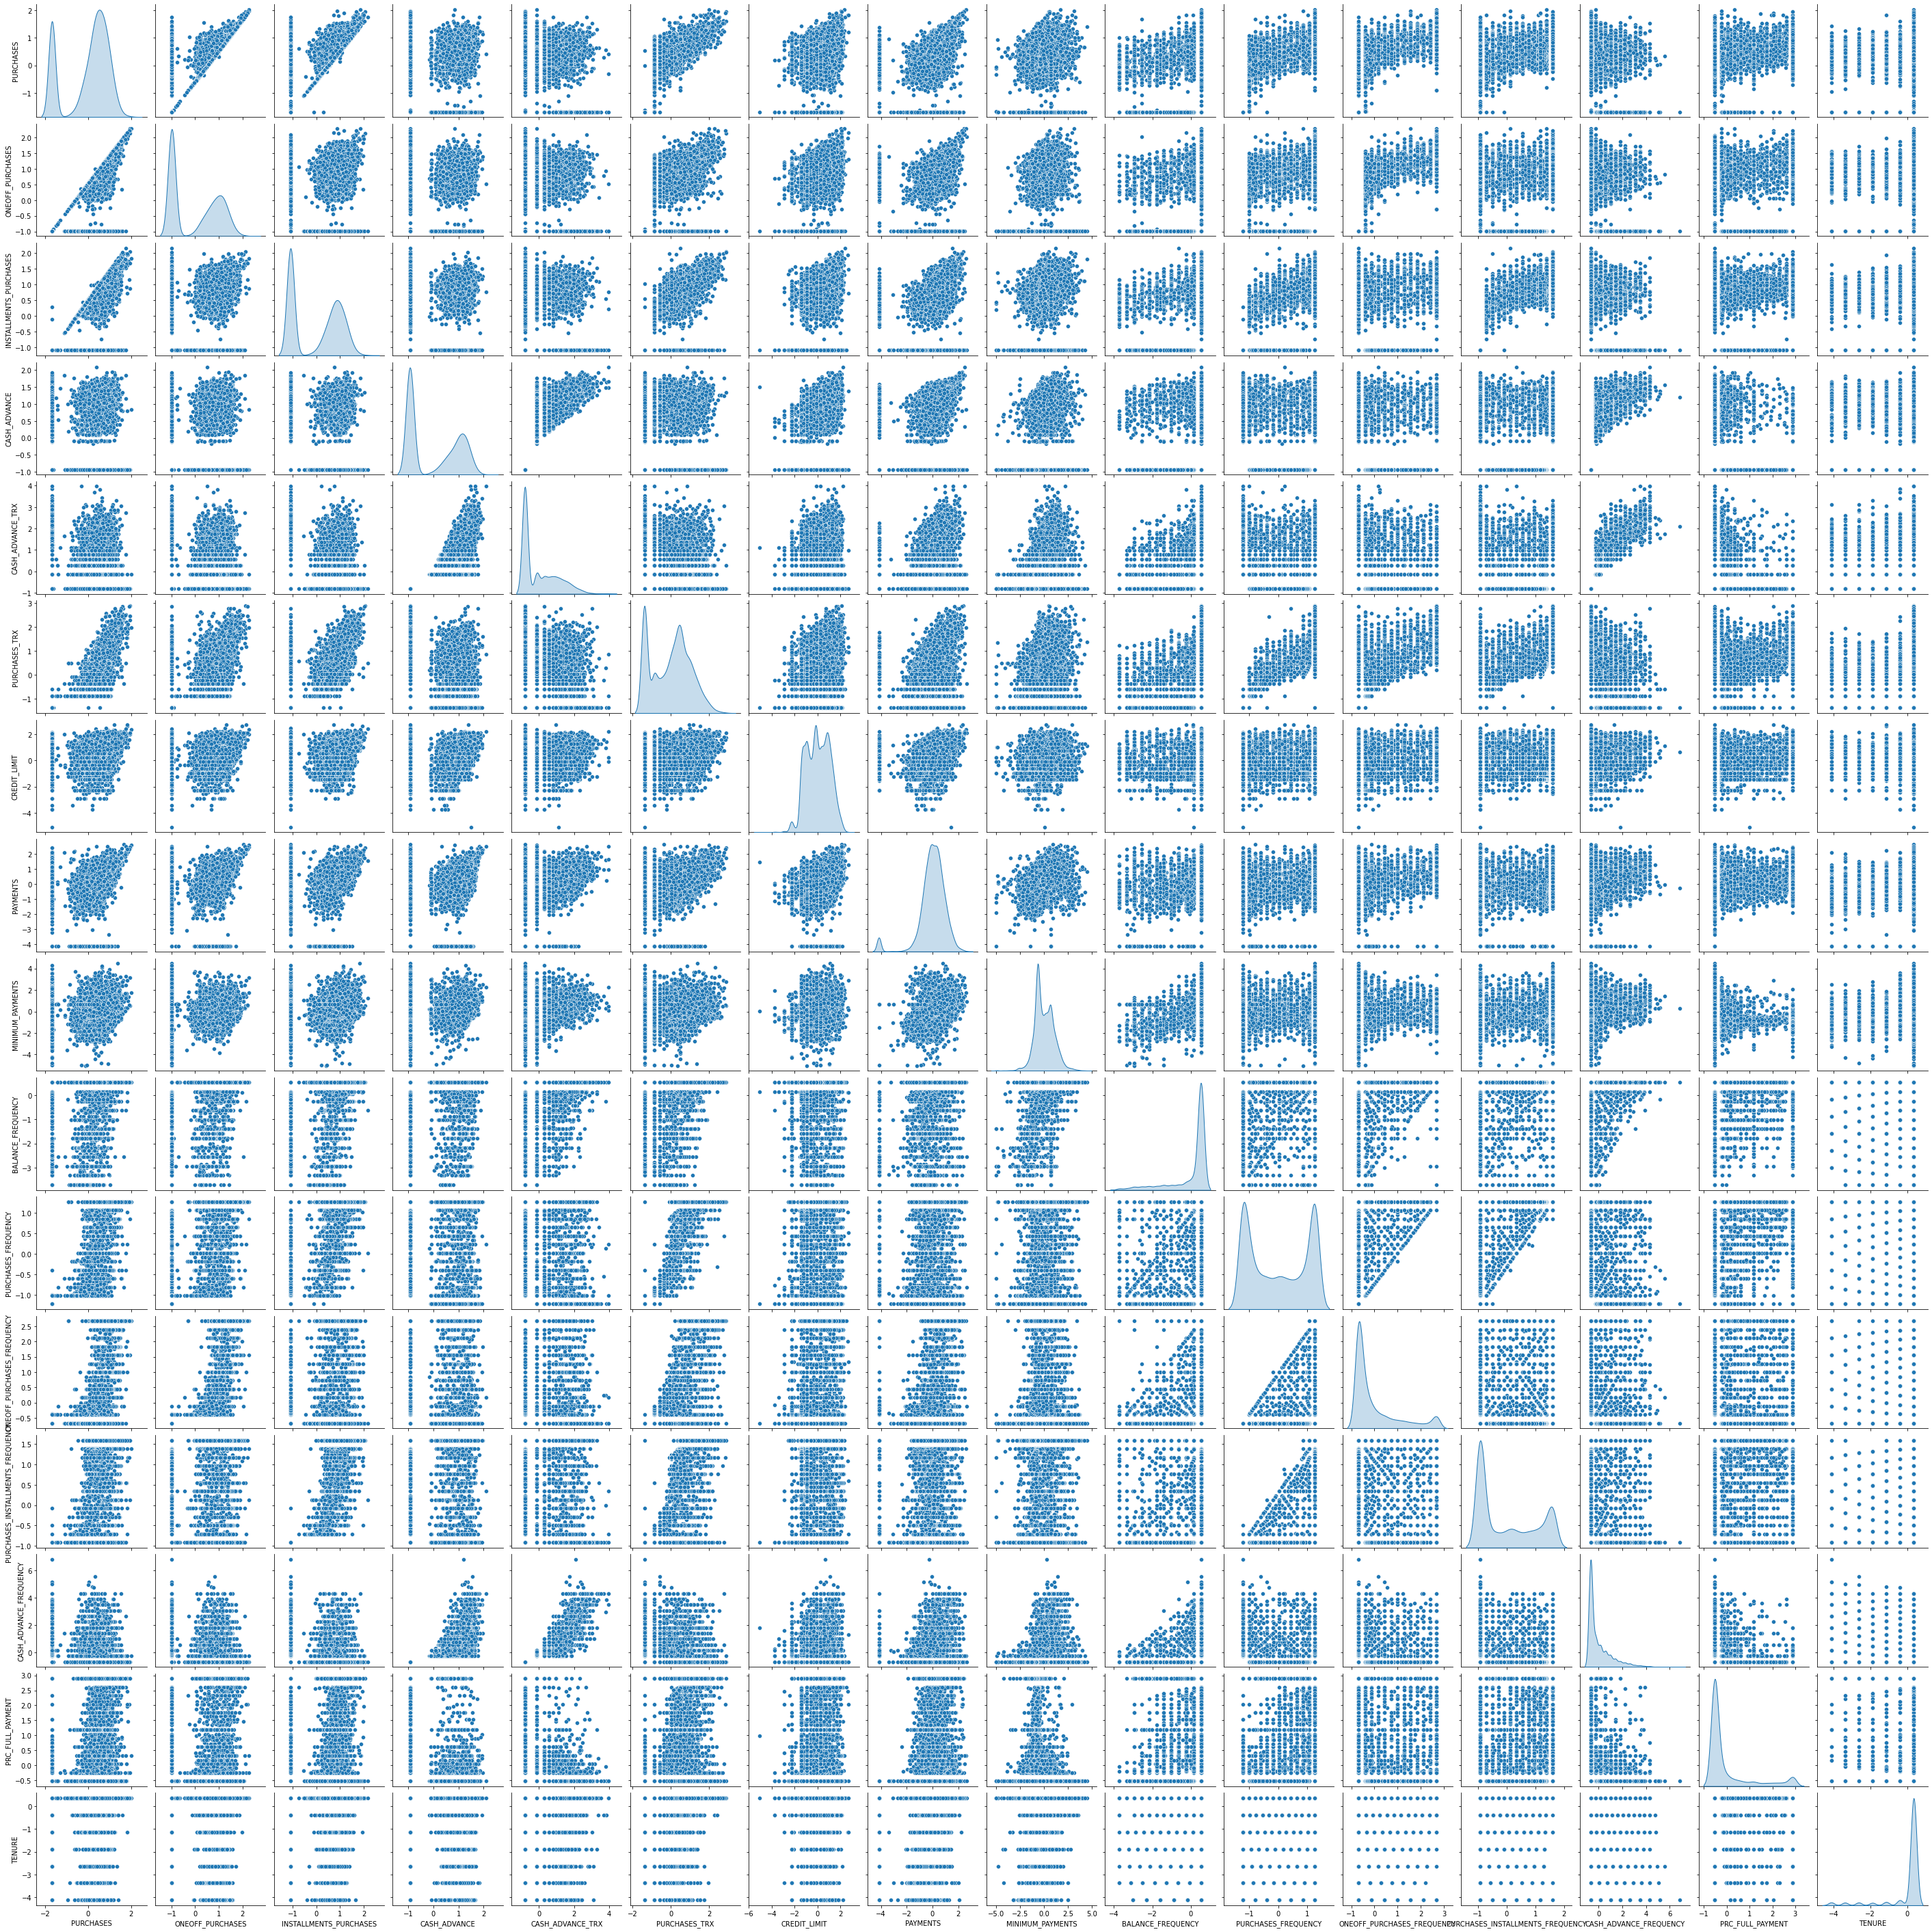

In [70]:

sns.pairplot(ccScaled,diag_kind='kde')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

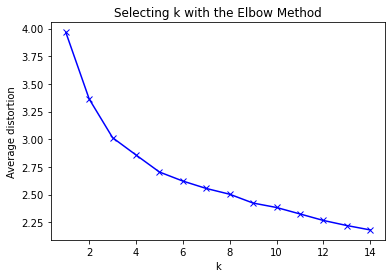

In [29]:
#Part a
#Build k means model on various k values
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(ccScaled)
    prediction=model.predict(ccScaled)
    meanDistortions.append(sum(np.min(cdist(ccScaled, model.cluster_centers_, 'euclidean'), axis=1)) / ccScaled.shape[0])

#Plotting the inertia against various k values.

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#Though the bend is not coming out clearly , let us look at 3 clusters and 5 clusters

In [30]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(ccScaled)
prediction=final_model.predict(ccScaled)

#Append the prediction 
cc["GROUP"] = prediction
ccScaled["GROUP"] = prediction
print("Groups Assigned : \n")
cc.head()

Groups Assigned : 



BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304   4.568506          0.000000                4.568506   
1  8.071989   0.000000          0.000000                0.000000   
2  7.822504   6.651791          6.651791                0.000000   
3  7.419183   7.313220          7.313220                0.000000   
4  6.707735   2.833213          2.833213                0.000000   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0      0.000000          0.000000       1.098612      6.908755  5.312231   
1      8.770896          1.609438       0.000000      8.853808  8.319725   
2      0.000000          0.000000       2.564949      8.922792  6.434654   
3      5.331694          0.693147       0.693147      8.922792  0.000000   
4      0.000000          0.000000       0.693147      7.090910  6.521114   

   MINIMUM_PAYMENTS  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0          4.945277           0.818182             0.166667   
1          6.978531           0.909091             0.000000   
2          6.442994           1.000000             1.000000   
3          6.762968           0.636364             0.083333   
4          5.504483           1.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  TENURE  GROUP  
0                0.000000          0.000000      12      1  
1                0.250000          0.222222      12      0  
2                0.000000          0.000000      12      2  
3                0.083333          0.000000      12      1  
4                0.000000          0.000000      12      1

In [31]:
ccClust = cc.groupby(['GROUP'])
ccClust.mean()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
GROUP                                                                  
0      7.122213   1.549853          1.262675                0.414529   
1      4.689795   5.779642          2.337157                4.233831   
2      6.992564   7.440913          6.438550                5.440946   

       CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
GROUP                                                                          
0          6.932309          1.738023       0.402163      8.043479  6.626026   
1          0.489684          0.089986       2.047947      7.799568  5.939591   
2          2.982622          0.740562       3.332557      8.528794  7.498916   

       MINIMUM_PAYMENTS  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
GROUP                                                             
0              6.324560           0.899942             0.067303   
1              5.372611           0.777886             0.557663   
2              6.283837           0.979561             0.867335   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
GROUP                                                                 
0                        0.041660                          0.023772   
1                        0.081688                          0.462353   
2                        0.532923                          0.612106   

       CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT     TENURE  
GROUP                                                       
0                    0.294558          0.039716  11.309917  
1                    0.011733          0.222813  11.467138  
2                    0.118483          0.190127  11.808519

array([[<AxesSubplot:title={'center':'BALANCE_FREQUENCY'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'PAYMENTS'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'PURCHASES'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}, xlabel='[GRO

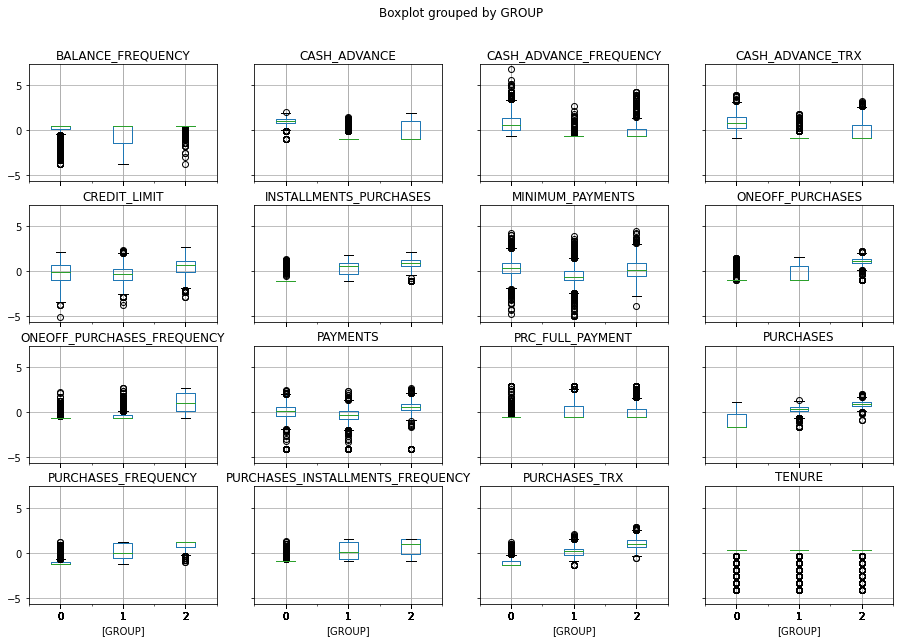

In [32]:
ccScaled.boxplot(by='GROUP',figsize=(15,10))

In [28]:
ccScaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PURCHASES                         8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   CASH_ADVANCE                      8950 non-null   float64
 4   CASH_ADVANCE_TRX                  8950 non-null   float64
 5   PURCHASES_TRX                     8950 non-null   float64
 6   CREDIT_LIMIT                      8950 non-null   float64
 7   PAYMENTS                          8950 non-null   float64
 8   MINIMUM_PAYMENTS                  8950 non-null   float64
 9   BALANCE_FREQUENCY                 8950 non-null   float64
 10  PURCHASES_FREQUENCY               8950 non-null   float64
 11  ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 12  PURCHA

In [33]:
#using silhouette score: Higher the value, better the cluster. 
from sklearn.metrics import silhouette_score

# create a list for different values of K
n_clusters = np.arange(2,15)


# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(ccScaled)
    score = silhouette_score(ccScaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.27315862321057005)
For n_clusters = 3, silhouette score is 0.23327782879599193)
For n_clusters = 4, silhouette score is 0.22186437266156406)
For n_clusters = 5, silhouette score is 0.22799061057756279)
For n_clusters = 6, silhouette score is 0.2232557070377861)
For n_clusters = 7, silhouette score is 0.22556327308773524)
For n_clusters = 8, silhouette score is 0.22005079810796227)
For n_clusters = 9, silhouette score is 0.188195210355193)
For n_clusters = 10, silhouette score is 0.19419247754769448)
For n_clusters = 11, silhouette score is 0.1958845706754124)
For n_clusters = 12, silhouette score is 0.1923996364000501)
For n_clusters = 13, silhouette score is 0.19101172649152884)
For n_clusters = 14, silhouette score is 0.196070794845277)


In [ ]:
# k=2 gave the best cluster

In [77]:
#Question 3
#PCA to the dataset

# independant variables
X = cc.drop(['CREDIT_LIMIT'], axis=1)
# the dependent variable
y = cc[['CREDIT_LIMIT']]

In [34]:
from sklearn.decomposition import PCA
ccScaled.head()
#We are going to use the scaled dataset on which we already applied the Z-score

PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0  -0.113532         -0.987090                0.394480     -0.930733   
1  -1.679855         -0.987090               -1.087454      1.528788   
2   0.600727          1.062022               -1.087454     -0.930733   
3   0.827499          1.265778               -1.087454      0.564372   
4  -0.708481         -0.114307               -1.087454     -0.930733   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         -0.810069      -0.579510     -1.447207 -0.824484         -0.853119   
1          0.784603      -1.379210      0.925998  1.065033          0.870592   
2         -0.810069       0.487865      1.010166 -0.119300          0.416585   
3         -0.123281      -0.874655      1.010166 -4.161996          0.687847   
4         -0.810069      -0.874655     -1.224955 -0.064979         -0.379047   

   BALANCE_FREQUENCY  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0          -0.249434            -0.806490                   -0.678661   
1           0.134325            -1.221758                   -0.678661   
2           0.518084             1.269843                    2.673451   
3          -1.016953            -1.014125                   -0.399319   
4           0.518084            -1.014125                   -0.399319   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  \
0                         -0.707313               -0.675349         -0.525551   
1                         -0.916995                0.573963          0.234227   
2                         -0.916995               -0.675349         -0.525551   
3                         -0.916995               -0.258913         -0.525551   
4                         -0.916995               -0.675349         -0.525551   

    TENURE  GROUP  
0  0.36068      1  
1  0.36068      0  
2  0.36068      2  
3  0.36068      1  
4  0.36068      1

In [35]:
covMatrix = np.cov(ccScaled,rowvar=False)
print(covMatrix)

#To find principle components we need to find the eigen vectors of the covariance matrix

[[ 1.00011174  0.68358595  0.6854669  -0.49661151 -0.41671424  0.88908731
   0.18762036  0.20680217 -0.05865922  0.09700416  0.78183728  0.54737567
   0.59247694 -0.34903926  0.25176659  0.10637956  0.63098662]
 [ 0.68358595  1.00011174  0.16145224 -0.19016758 -0.14481937  0.57445711
   0.28482718  0.26705675  0.04963338  0.14046835  0.37367616  0.77001955
   0.09279096 -0.11669989  0.04328966  0.09196345  0.4894626 ]
 [ 0.6854669   0.16145224  1.00011174 -0.39436193 -0.33565818  0.78277013
   0.10652813  0.16545012 -0.04750838  0.11269992  0.79487293  0.1899514
   0.8787698  -0.28841032  0.27447117  0.09940489  0.51009487]
 [-0.49661151 -0.19016758 -0.39436193  1.00011174  0.8984983  -0.43082155
   0.11946962  0.18253901  0.39695291  0.16452865 -0.4326587  -0.18199291
  -0.35653335  0.77034654 -0.32277631 -0.10047063 -0.35676467]
 [-0.41671424 -0.14481937 -0.33565818  0.8984983   1.00011174 -0.35793506
   0.12459141  0.199825    0.40382911  0.19367543 -0.36719204 -0.14619933
  -0.3054

In [36]:
pca = PCA(n_components=17)
#Here we are taking all the 17 attributes that we had
pca.fit(ccScaled)
print(pca.explained_variance_)
#Below are all the Eigen values for each component

[6.1618215  3.02386653 1.60009142 1.18476729 1.11324666 0.84799693
 0.66905075 0.53591755 0.46392959 0.31498993 0.20813337 0.1427562
 0.12090743 0.11465459 0.04770717 0.04491861 0.02720905]


In [37]:
print(pca.components_)

#Eigen Vectors

[[ 3.61197414e-01  2.25244628e-01  3.18687616e-01 -2.61722275e-01
  -2.41621875e-01  3.77019276e-01  6.93353468e-02  8.12580093e-02
  -6.53706742e-02  5.05870012e-02  3.62625957e-01  2.34906603e-01
   3.03944896e-01 -2.15412882e-01  1.54731578e-01  6.55962920e-02
   2.76161203e-01]
 [ 8.08834156e-02  2.17348027e-01  2.60634354e-02  3.50938667e-01
   3.90115540e-01  1.29313482e-01  2.86228689e-01  3.34947990e-01
   3.62653087e-01  3.13300728e-01  7.64482719e-02  2.19986450e-01
   2.50723536e-02  3.77079738e-01 -1.37484721e-01  8.78533665e-02
   7.74617985e-02]
 [ 7.30983231e-02  4.86936460e-01 -3.94345453e-01 -1.20333195e-01
  -1.49865064e-01 -6.67107269e-02  1.95311497e-01  3.97567314e-02
  -9.95592363e-02 -1.54797595e-01 -2.20097590e-01  4.25227276e-01
  -4.71656835e-01 -1.50442355e-01 -1.46255421e-02  8.81935995e-02
   6.85817509e-02]
 [ 7.66942548e-02  1.28171587e-01 -9.51695647e-04  1.71764330e-01
   2.22447860e-01  5.91049822e-02 -9.99546909e-02 -5.10367758e-02
  -3.47751601e-01 -

In [38]:
print(pca.explained_variance_ratio_)
#Along the first component or the first eigen vector
#37% variance in the dataset can be explained 
#Similarly for others too the next eigen vector explains 18% variance in the data and so on

[0.37070356 0.18191992 0.09626368 0.07127721 0.06697443 0.05101665
 0.040251   0.03224153 0.02791064 0.01895022 0.01252159 0.00858841
 0.00727396 0.00689778 0.00287013 0.00270236 0.00163693]


In [39]:
var_ratio={}
for n in range(2,18):
    pca=PCA(n_components=n)
    cc_pca=pca.fit(ccScaled)
    var_ratio[n]=sum(cc_pca.explained_variance_ratio_)

In [40]:
var_ratio


#8: 0.910560286637544 (This means 8 components explain about 91% of the data)

{2: 0.5526234885234953,
 3: 0.6488871650937673,
 4: 0.7201643768516571,
 5: 0.7871388104124686,
 6: 0.838155459250443,
 7: 0.8784064627382703,
 8: 0.9106479915636251,
 9: 0.938558626672973,
 10: 0.9575088493669963,
 11: 0.9700304358725254,
 12: 0.9786188429494259,
 13: 0.9858927982401776,
 14: 0.9927905742767255,
 15: 0.9956607022780847,
 16: 0.9983630667985254,
 17: 1.0}

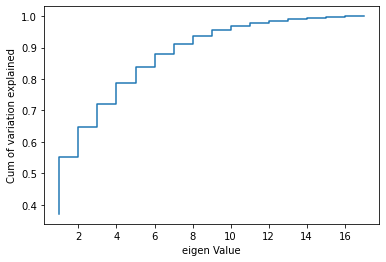

In [41]:
plt.step(list(range(1,18)),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#Here 8 dimensions seems very reasonable.
#With 8 variables we can explain over 91% of the variation in the original data

In [42]:
pca3 = PCA(n_components=8)
pca3.fit(ccScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
CCpca3 = pca3.transform(ccScaled)

[[ 3.61197414e-01  2.25244628e-01  3.18687616e-01 -2.61722275e-01
  -2.41621875e-01  3.77019276e-01  6.93353468e-02  8.12580093e-02
  -6.53706742e-02  5.05870012e-02  3.62625957e-01  2.34906603e-01
   3.03944896e-01 -2.15412882e-01  1.54731578e-01  6.55962920e-02
   2.76161203e-01]
 [ 8.08834156e-02  2.17348027e-01  2.60634354e-02  3.50938667e-01
   3.90115540e-01  1.29313482e-01  2.86228689e-01  3.34947990e-01
   3.62653087e-01  3.13300728e-01  7.64482719e-02  2.19986450e-01
   2.50723536e-02  3.77079738e-01 -1.37484721e-01  8.78533665e-02
   7.74617985e-02]
 [ 7.30983231e-02  4.86936460e-01 -3.94345453e-01 -1.20333195e-01
  -1.49865064e-01 -6.67107269e-02  1.95311497e-01  3.97567314e-02
  -9.95592363e-02 -1.54797595e-01 -2.20097590e-01  4.25227276e-01
  -4.71656835e-01 -1.50442355e-01 -1.46255421e-02  8.81935995e-02
   6.85817509e-02]
 [ 7.66942548e-02  1.28171587e-01 -9.51695647e-04  1.71764330e-01
   2.22447860e-01  5.91049822e-02 -9.99546909e-02 -5.10367758e-02
  -3.47751601e-01 -

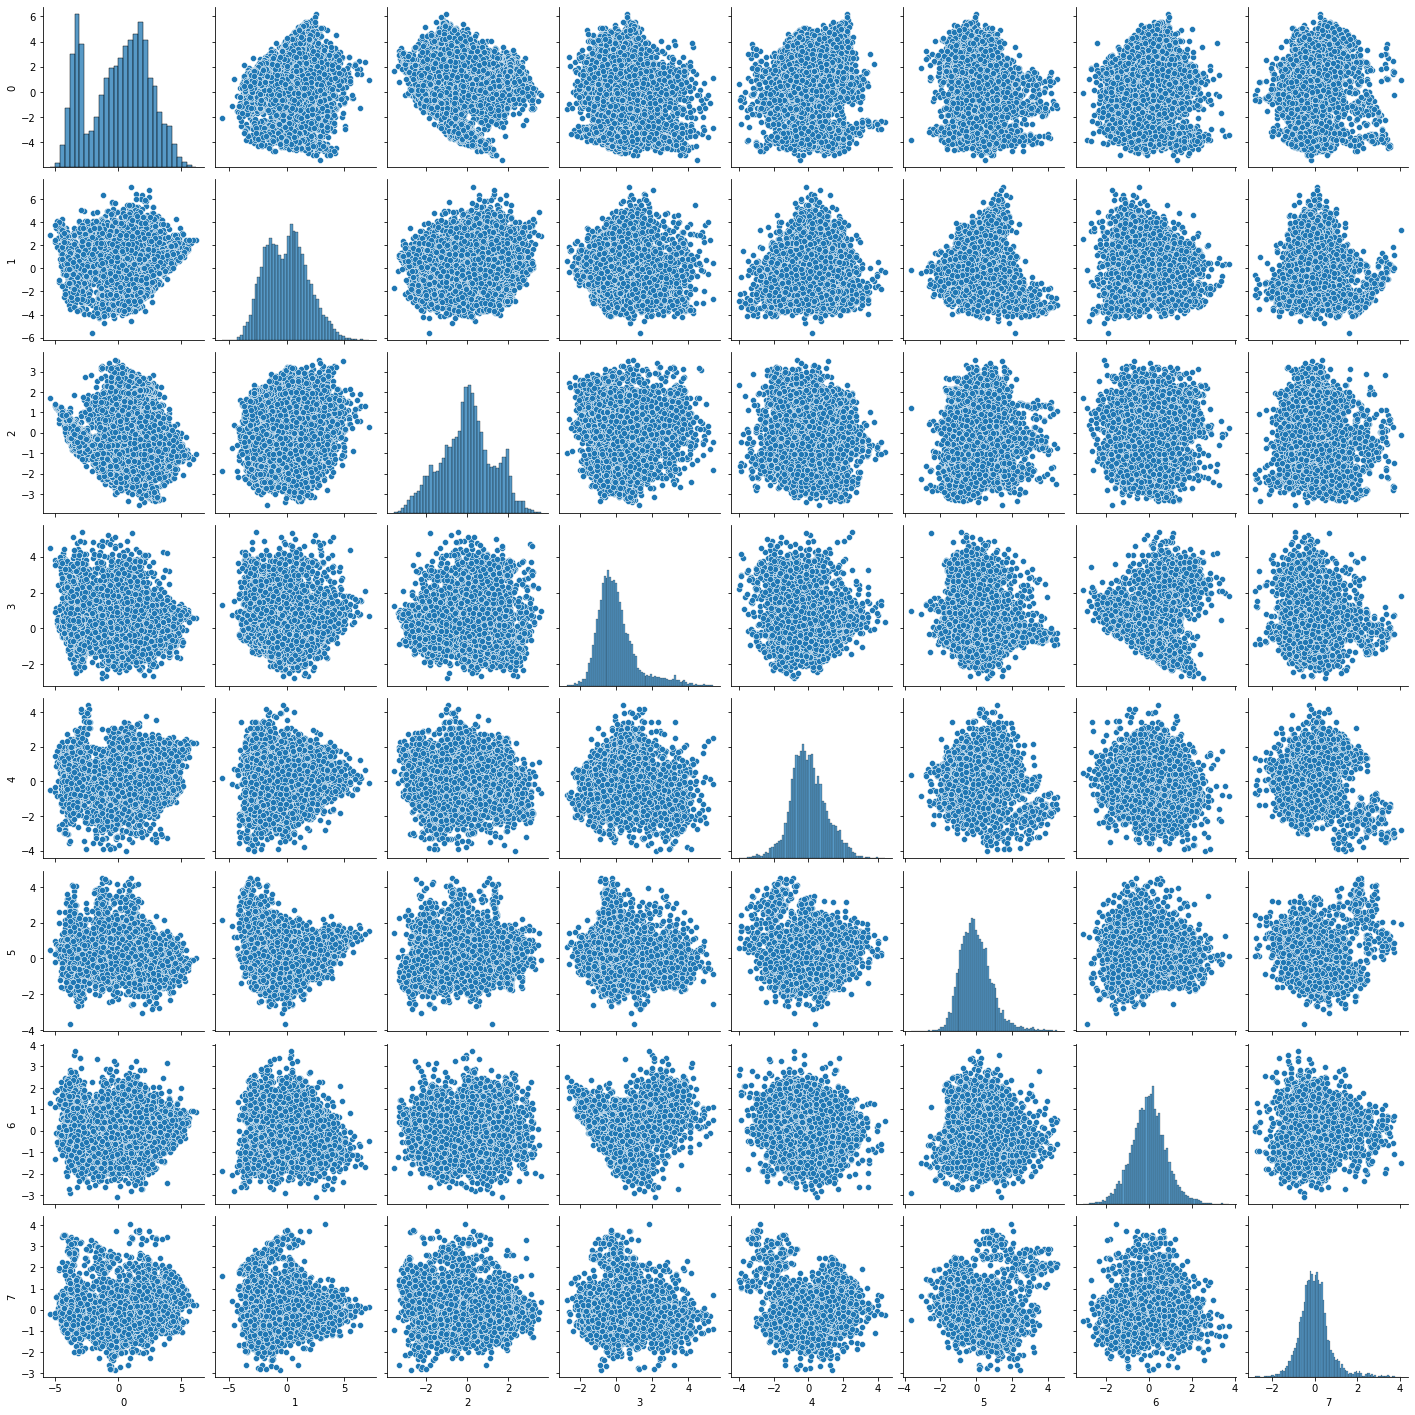

In [87]:
sns.pairplot(pd.DataFrame(CCpca3))

#In the original 17 varibales we could see linear relationships amoung the variables
#But here with 8 variables we can clearly see no relatonship amoung variables as they are independent of each other

In [ ]:
#perform all steps from Q2 on the new features generated using PCA

In [44]:
CCpca3.shape

(8950, 8)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

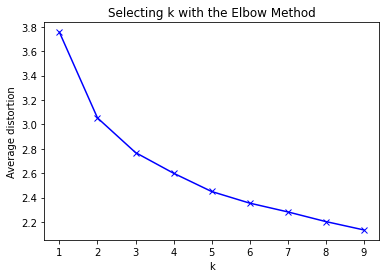

In [45]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(CCpca3)
    prediction=model.predict(CCpca3)
    meanDistortions.append(sum(np.min(cdist(CCpca3, model.cluster_centers_, 'euclidean'), axis=1)) / CCpca3.shape[0])

#Plotting the inertia against various k values.

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [46]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(CCpca3)
prediction1=final_model.predict(CCpca3)

#Append the prediction 
cc["GROUP2"] = prediction1

print("Groups Assigned : \n")
cc.head()

Groups Assigned : 



BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304   4.568506          0.000000                4.568506   
1  8.071989   0.000000          0.000000                0.000000   
2  7.822504   6.651791          6.651791                0.000000   
3  7.419183   7.313220          7.313220                0.000000   
4  6.707735   2.833213          2.833213                0.000000   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0      0.000000          0.000000       1.098612      6.908755  5.312231   
1      8.770896          1.609438       0.000000      8.853808  8.319725   
2      0.000000          0.000000       2.564949      8.922792  6.434654   
3      5.331694          0.693147       0.693147      8.922792  0.000000   
4      0.000000          0.000000       0.693147      7.090910  6.521114   

   MINIMUM_PAYMENTS  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0          4.945277           0.818182             0.166667   
1          6.978531           0.909091             0.000000   
2          6.442994           1.000000             1.000000   
3          6.762968           0.636364             0.083333   
4          5.504483           1.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT  TENURE  GROUP  GROUP2  
0                0.000000          0.000000      12      1       2  
1                0.250000          0.222222      12      0       0  
2                0.000000          0.000000      12      2       1  
3                0.083333          0.000000      12      1       2  
4                0.000000          0.000000      12      1       2

In [47]:
ccClust = cc.groupby(['GROUP2'])
ccClust.mean()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
GROUP2                                                                  
0       7.122213   1.549853          1.262675                0.414529   
1       6.992564   7.440913          6.438550                5.440946   
2       4.689795   5.779642          2.337157                4.233831   

        CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
GROUP2                                                                          
0           6.932309          1.738023       0.402163      8.043479  6.626026   
1           2.982622          0.740562       3.332557      8.528794  7.498916   
2           0.489684          0.089986       2.047947      7.799568  5.939591   

        MINIMUM_PAYMENTS  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
GROUP2                                                             
0               6.324560           0.899942             0.067303   
1               6.283837           0.979561             0.867335   
2               5.372611           0.777886             0.557663   

        ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
GROUP2                                                                 
0                         0.041660                          0.023772   
1                         0.532923                          0.612106   
2                         0.081688                          0.462353   

        CASH_ADVANCE_FREQUENCY  PRC_FULL_PAYMENT     TENURE  GROUP  
GROUP2                                                              
0                     0.294558          0.039716  11.309917      0  
1                     0.118483          0.190127  11.808519      2  
2                     0.011733          0.222813  11.467138      1

In [48]:
#using silhouette score: Higher the value, better the cluster. 


# create a list for different values of K
n_clusters = np.arange(2,9)


# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(CCpca3)
    score = silhouette_score(CCpca3, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.29401187494618936)
For n_clusters = 3, silhouette score is 0.2541524144749136)
For n_clusters = 4, silhouette score is 0.24613056293098814)
For n_clusters = 5, silhouette score is 0.25285004749975776)
For n_clusters = 6, silhouette score is 0.2571302187243774)
For n_clusters = 7, silhouette score is 0.2545735485723637)
For n_clusters = 8, silhouette score is 0.2185704143692298)


In [ ]:
#k=2 gave the best cluster

In [ ]:
#Question 4
#Create a new column as a cluster label in the original data frame and perform cluster analysis

In [54]:
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(ccScaled)

KMeans(n_clusters=3)

In [55]:
cc['Cluster'] = kmeans1.labels_

In [56]:
cc['Cluster'].value_counts()

0    3393
2    2904
1    2653
Name: Cluster, dtype: int64

In [58]:
cc.shape

(8950, 20)

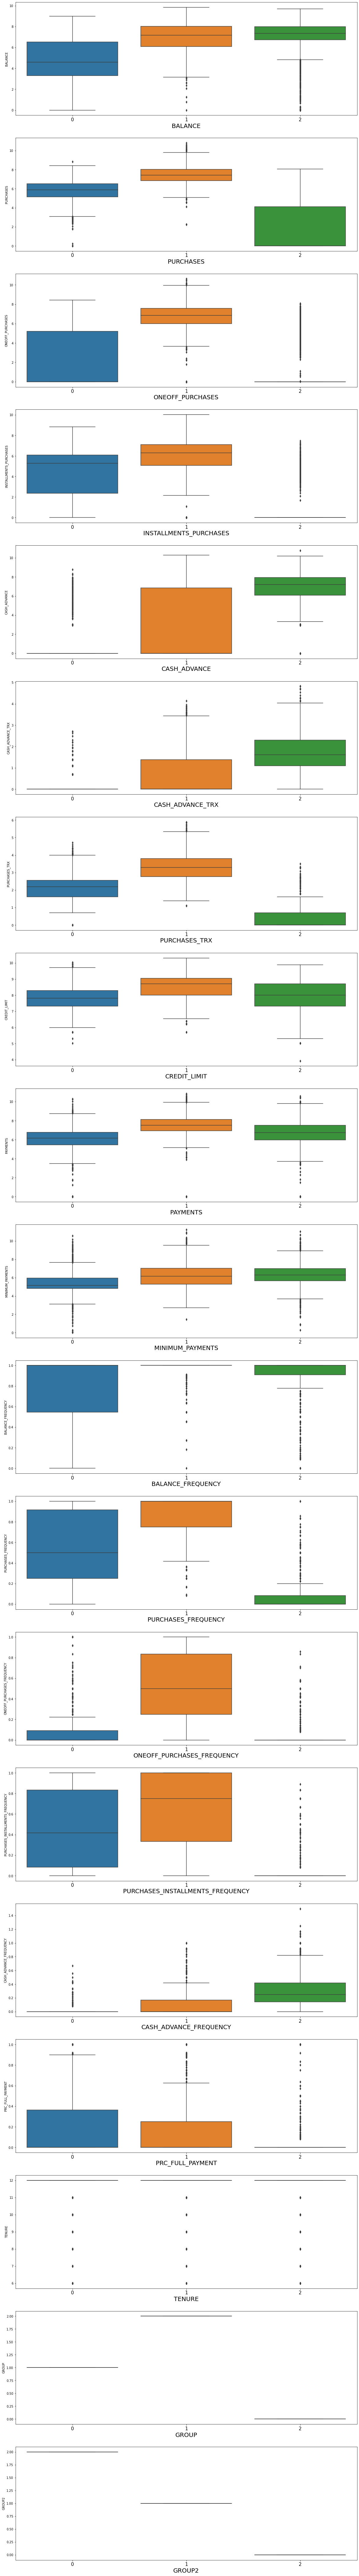

In [59]:
plt.figure(figsize = (20, 170))
for index, column in enumerate(cc.columns.values):
    if column != "Cluster":
        plt.subplot(21, 1, index + 1)
        sns.boxplot(x = cc['Cluster'], y = cc[column])
        plt.xlabel(xlabel = column, size = 20)
        plt.xticks(size = 15)      

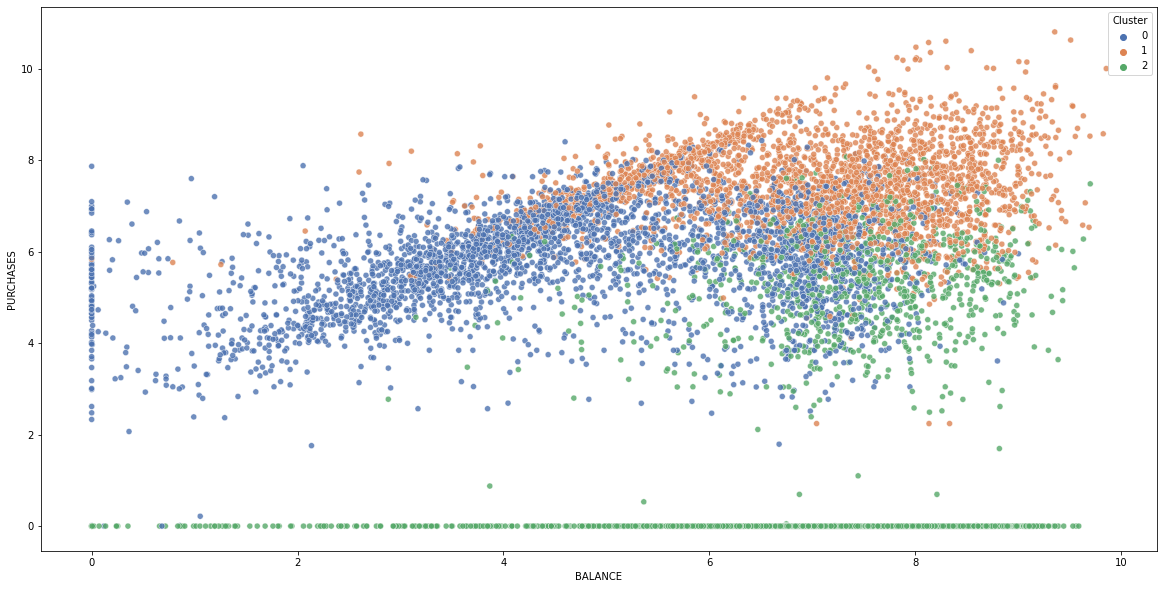

In [60]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = cc, x = "BALANCE", y = "PURCHASES", hue 
= "Cluster", palette = "deep", alpha = 0.8);

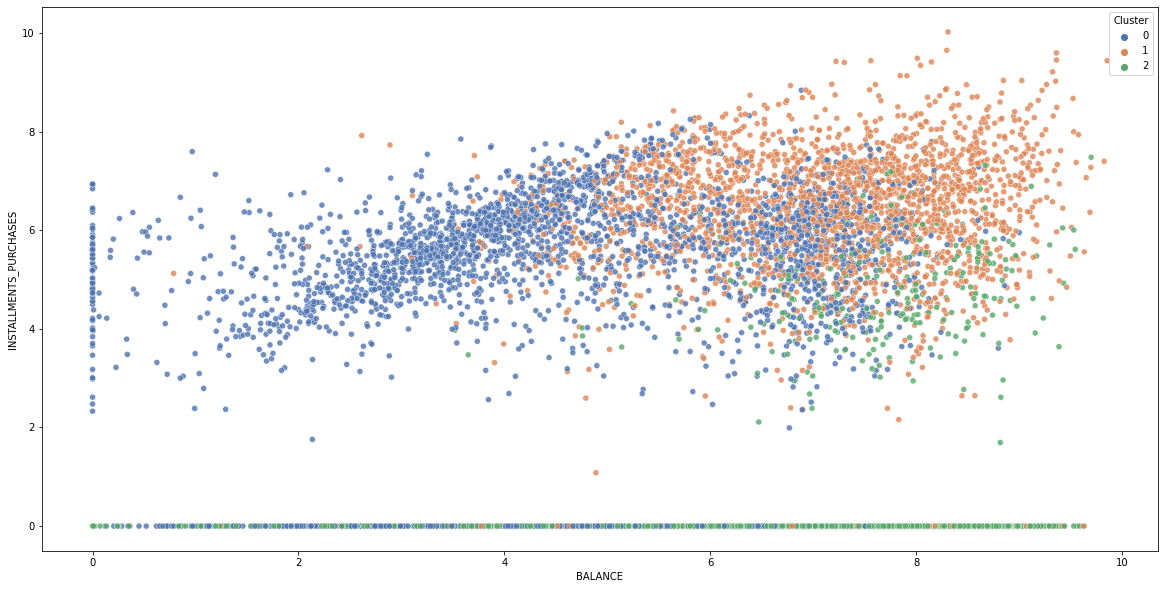

In [68]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = cc, x = "BALANCE", y = "INSTALLMENTS_PURCHASES",
                hue = "Cluster", palette = "deep", alpha = 0.8);

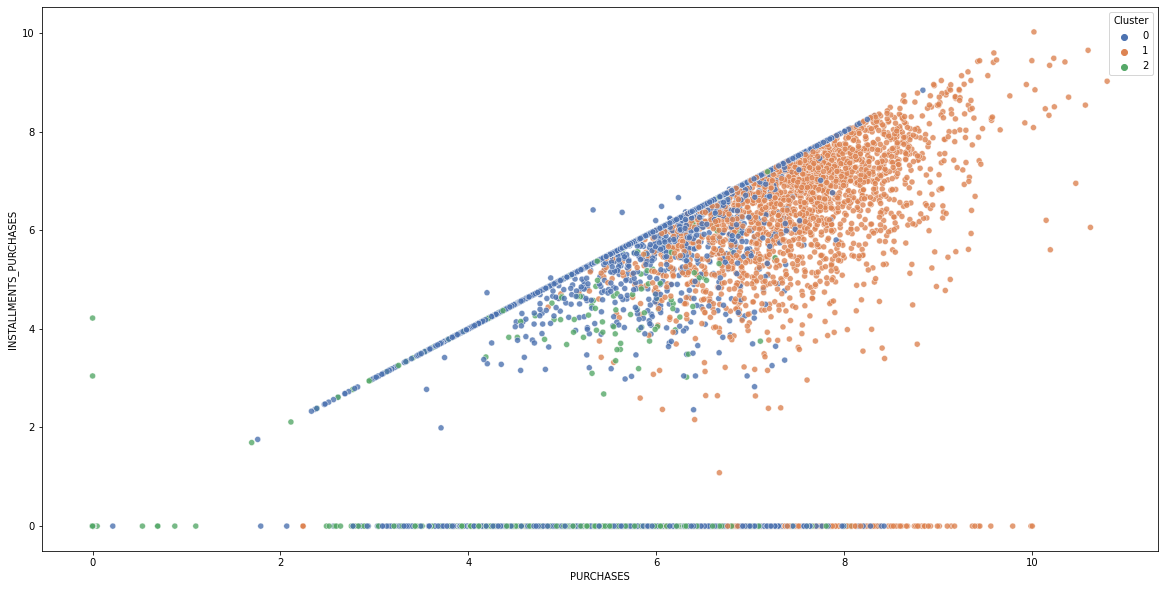

In [69]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = cc, x = "PURCHASES", y = "INSTALLMENTS_PURCHASES",
                hue = "Cluster", palette = "deep", alpha = 0.8);

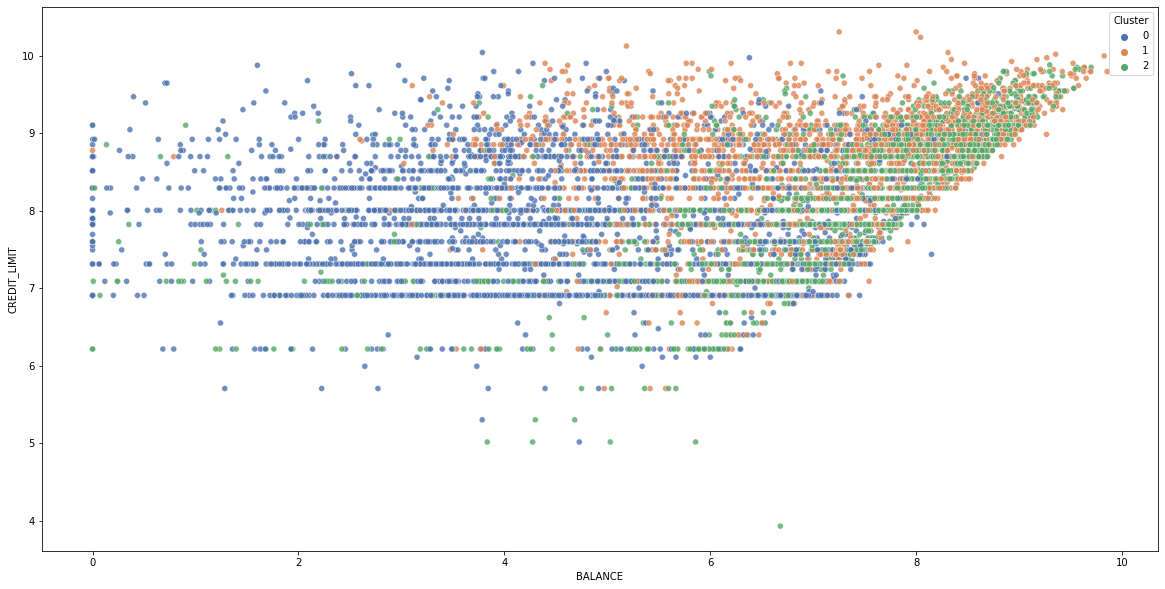

In [70]:
plt.figure(figsize = (20, 10))
sns.scatterplot(data = cc, x = "BALANCE", y = "CREDIT_LIMIT", 
hue = "Cluster", palette = "deep", alpha = 0.8);

In [ ]:
#Question 5

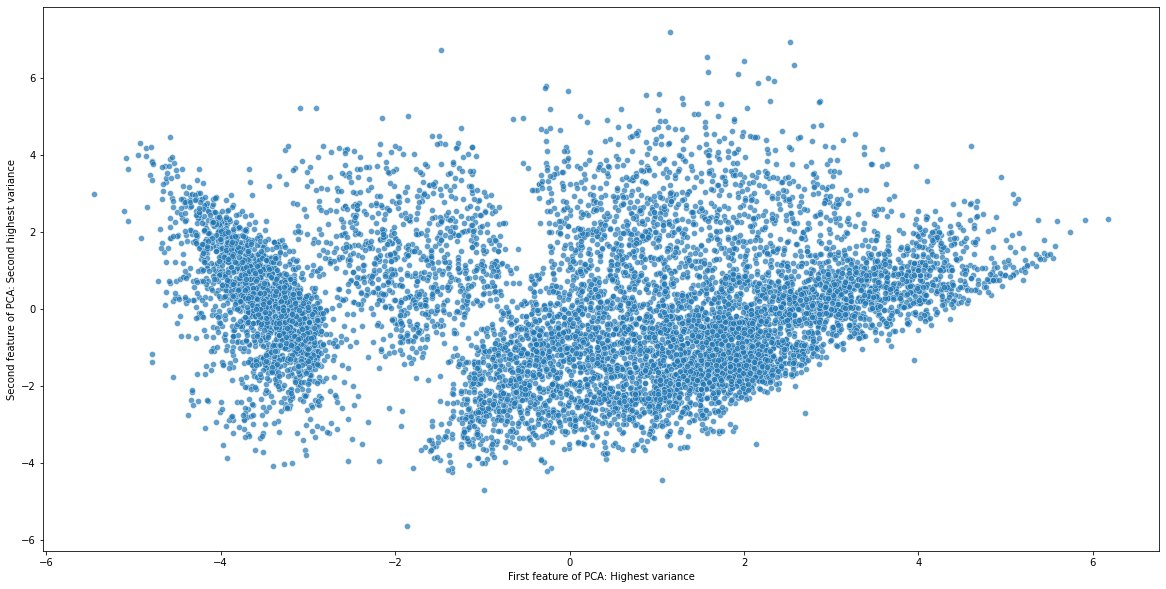

In [73]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = CCpca3[:,0], y = CCpca3[:,1] ,palette = "deep", alpha = 0.7);
plt.xlabel("First feature of PCA: Highest variance")
plt.ylabel("Second feature of PCA: Second highest variance");

In [68]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(ccScaled, y)
regression_model.score(ccScaled, y)
#We were able to explain 100% of the data using all the components 

1.0

In [69]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(CCpca3, y)
regression_model_pca.score(CCpca3, y)

#We were able to explain 92% of the data using 8 components 

0.926406507583371